In [329]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import RobustScaler

## Dataset

In [330]:
#read dataset

df=pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [331]:
#checking the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [332]:
#checking for null values

df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [333]:
#checing the stats in the dataset

df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [334]:
#checing the correlation between variables

df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


### EDA

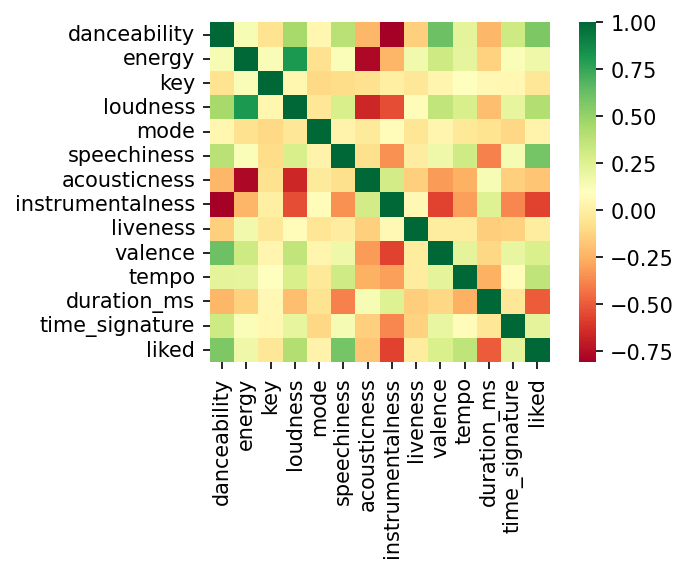

In [335]:
#plotting the heatmap

plt.figure(figsize=(5,3),dpi=150)
sns.heatmap(df.corr(),square=True,cmap='RdYlGn')
plt.show()

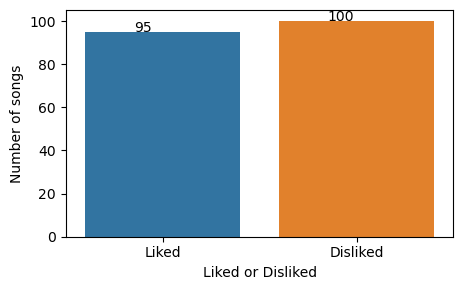

In [336]:
#plotting the countplot

plt.figure(figsize=(5,3),dpi=100)
ax=sns.countplot(x='liked',data=df)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.ylabel('Number of songs')
plt.xlabel('Liked or Disliked')
plt.xticks([0,1],['Liked',"Disliked"])
plt.show()

In [337]:
def histplot(x):
    plt.figure(figsize=(5,3),dpi=100)
    sns.histplot(df[x],kde=True)
    plt.show()

danceability


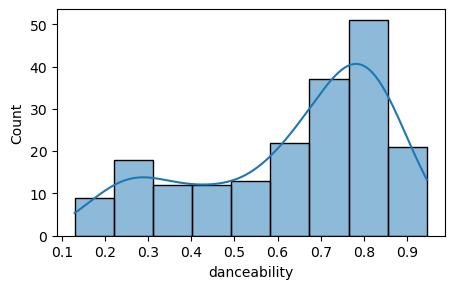

energy


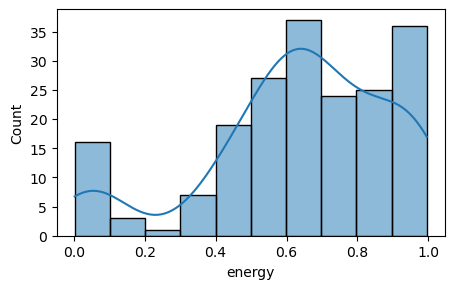

key


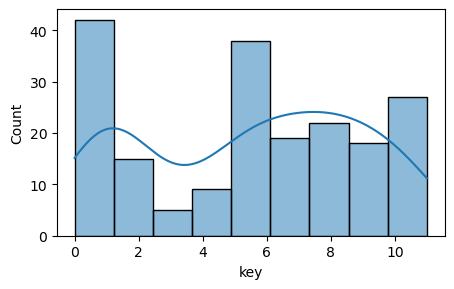

loudness


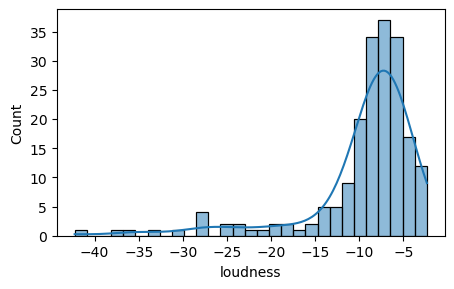

mode


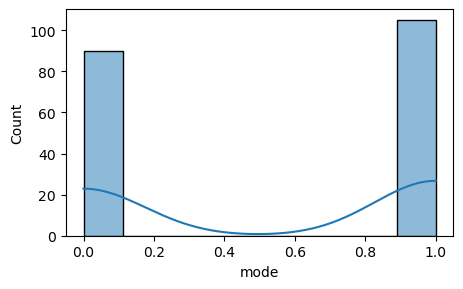

speechiness


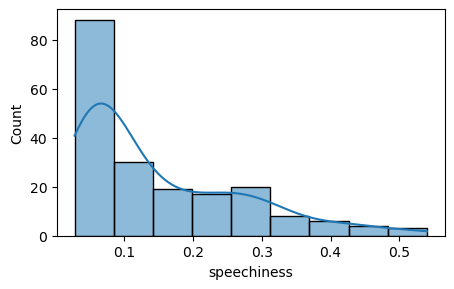

acousticness


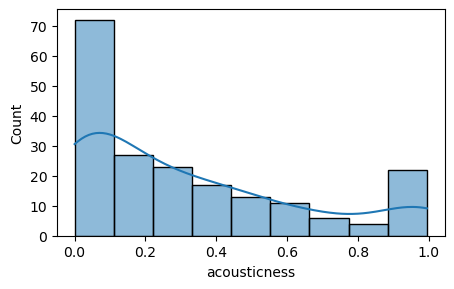

instrumentalness


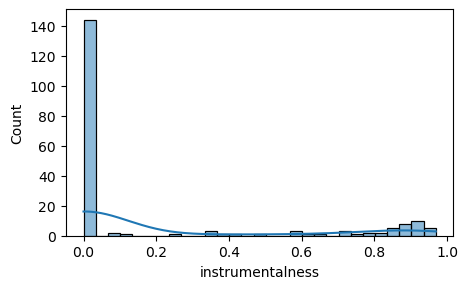

liveness


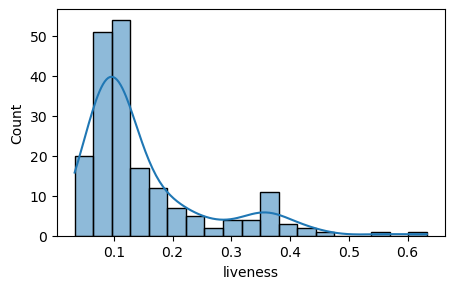

valence


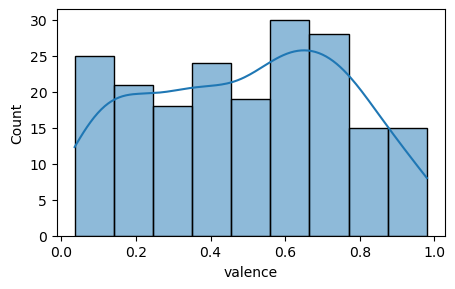

tempo


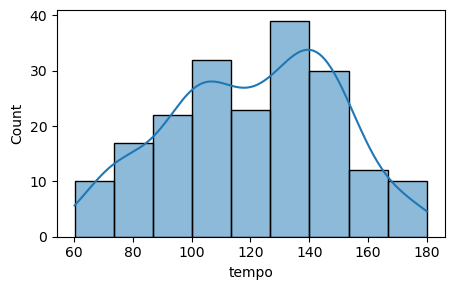

duration_ms


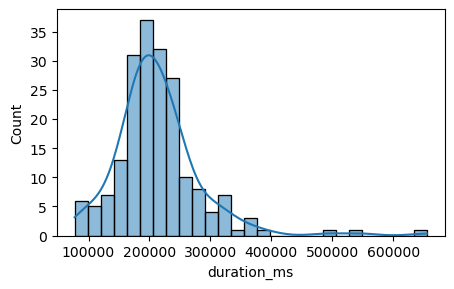

time_signature


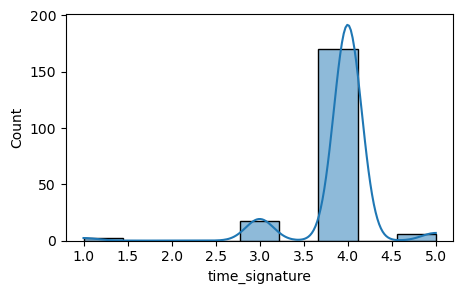

liked


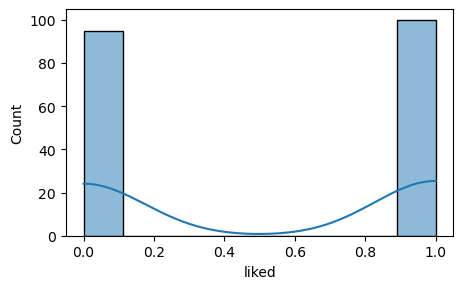

In [338]:
#plotting the histograms

for col in df.columns:
    print(col)
    histplot(col)

### ScatterPlot

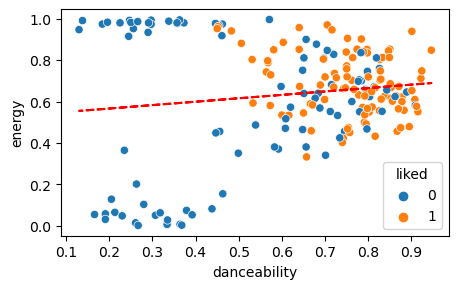

In [339]:
plt.figure(figsize=(5,3),dpi=100)
sns.scatterplot(x=df['danceability'],y=df['energy'],hue=df['liked'])

z = np.polyfit(df['danceability'], df['energy'], 1)
p = np.poly1d(z)
plt.plot(df['danceability'],p(df['danceability']),"r--")

plt.show()

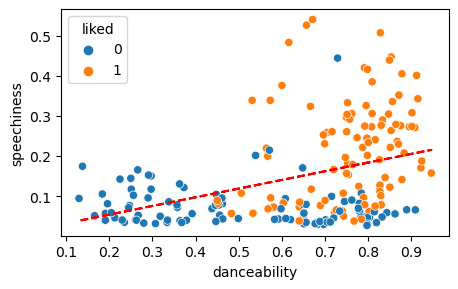

In [340]:
plt.figure(figsize=(5,3),dpi=100)
sns.scatterplot(x=df['danceability'],y=df['speechiness'],hue=df['liked'])
z = np.polyfit(df['danceability'], df['speechiness'], 1)
p = np.poly1d(z)
plt.plot(df['danceability'],p(df['danceability']),"r--")
plt.show()

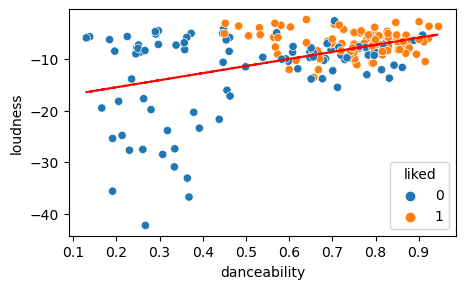

In [341]:
plt.figure(figsize=(5,3),dpi=100)
sns.scatterplot(x=df['danceability'],y=df['loudness'],hue=df['liked'])
z = np.polyfit(df['danceability'], df['loudness'], 1)
p = np.poly1d(z)
plt.plot(df['danceability'],p(df['danceability']),"r--")
plt.show()

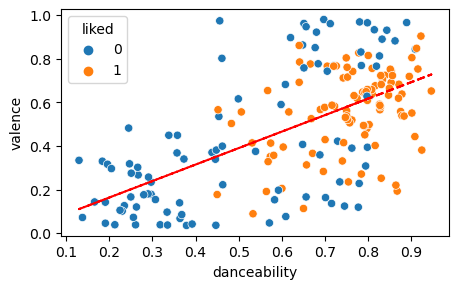

In [342]:
plt.figure(figsize=(5,3),dpi=100)
sns.scatterplot(x=df['danceability'],y=df['valence'],hue=df['liked'])

z = np.polyfit(df['danceability'], df['valence'], 1)
p = np.poly1d(z)
plt.plot(df['danceability'],p(df['danceability']),"r--")

plt.show()

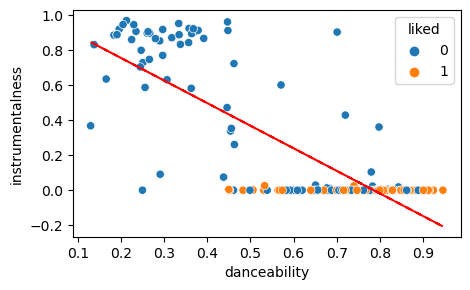

In [343]:
plt.figure(figsize=(5,3),dpi=100)
sns.scatterplot(x=df['danceability'],y=df['instrumentalness'],hue=df['liked'])

z = np.polyfit(df['danceability'], df['instrumentalness'], 1)
p = np.poly1d(z)
plt.plot(df['danceability'],p(df['danceability']),"r--")

plt.show()

### Box Plots

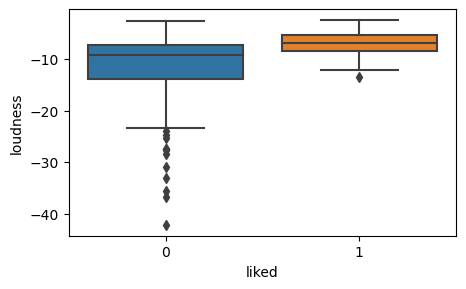

In [344]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='liked',y='loudness',data=df)
plt.show()

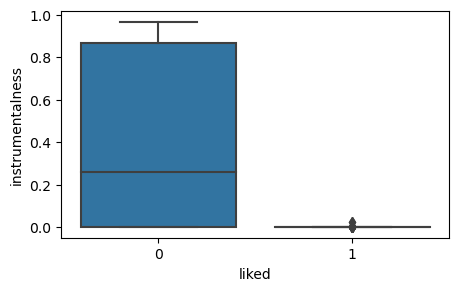

In [345]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='liked',y='instrumentalness',data=df)
plt.show()

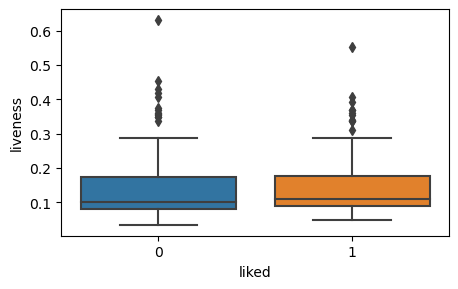

In [346]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='liked',y='liveness',data=df)
plt.show()

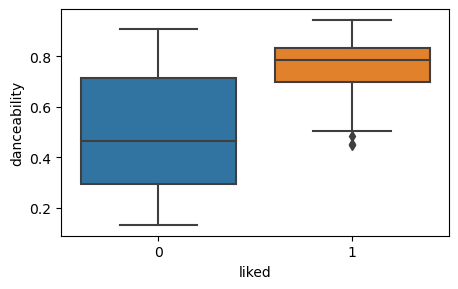

In [347]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='liked',y='danceability',data=df)
plt.show()

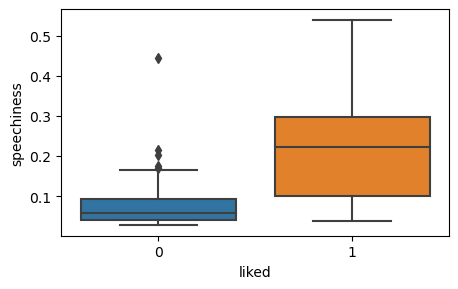

In [348]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='liked',y='speechiness',data=df)
plt.show()

EDA Analysis:
    

1. Songs in dataset has following attributes: high dancebaility (how suitable the track is for dancing), highly energtic, not acoustic, mix of happy and sad songs, has vocal content (not instrumental) and track is not live recorded.
2. Users liked songs score high on danceability and energy
3. Almost all the liked songs are not instrumental and hence is positively correlated with speechiness
4. Most of the liked songs are loud
5. User liked mix of happy and sad songs hence is not strongly correlated with Valence

## Data Prepartion for Modeling

In [349]:
#data preparation for model building

x=df.drop('liked',axis=1)
y=df['liked']

In [350]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
liked                 int64
dtype: object

In [351]:
#data preprocessing

scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)

In [352]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,stratify=y,random_state=21)

## Model Building

### KNN as base model

In [353]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print('Accuracy is: ',round(knn.score(x_test,y_test),2)*100)

Accuracy is:  90.0


### Building model using Logistic Regression, Decision Tree and Random Forest

In [354]:
rf=RandomForestClassifier(random_state=2)
dt=DecisionTreeClassifier(random_state=1)
lr=LogisticRegression(random_state=1)

In [355]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [356]:
def evaluation_metric(clf,x_scaled,y,n,score_method):
    score=cross_val_score(clf,x_scaled,y,cv=5,scoring=score_method)
    st='For {}, {} is {:.2f}'
    if clf==knn:
        print(st.format(clf,score_method,np.mean(score)))
    elif clf==lr:
        print(st.format(clf,score_method,np.mean(score)))
    elif clf==dt:
        print(st.format(clf,score_method,np.mean(score)))
    else:
        print(st.format(clf,score_method,np.mean(score)))

In [357]:
clf=[knn,lr,dt,rf]
for i in clf:
    #print(i)
    evaluation_metric(i,x_scaled,y,5,'accuracy')

For KNeighborsClassifier(), accuracy is 0.89
For LogisticRegression(random_state=1), accuracy is 0.92
For DecisionTreeClassifier(random_state=1), accuracy is 0.83
For RandomForestClassifier(random_state=2), accuracy is 0.92


[Text(738.5294117647059, 1009.5428571428572, 'instrumentalness <= 0.0\ngini = 0.5\nsamples = 136\nvalue = [66, 70]'),
 Text(410.29411764705884, 854.2285714285715, 'duration_ms <= 0.676\ngini = 0.227\nsamples = 69\nvalue = [9, 60]'),
 Text(246.1764705882353, 698.9142857142858, 'tempo <= -1.248\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(164.11764705882354, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(328.2352941176471, 543.6, 'valence <= -0.206\ngini = 0.092\nsamples = 62\nvalue = [3, 59]'),
 Text(246.1764705882353, 388.28571428571433, 'liveness <= -0.078\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(164.11764705882354, 232.97142857142865, 'key <= 0.583\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(82.05882352941177, 77.65714285714284, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(246.1764705882353, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(328.2352941176471, 232.97142857142865, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')

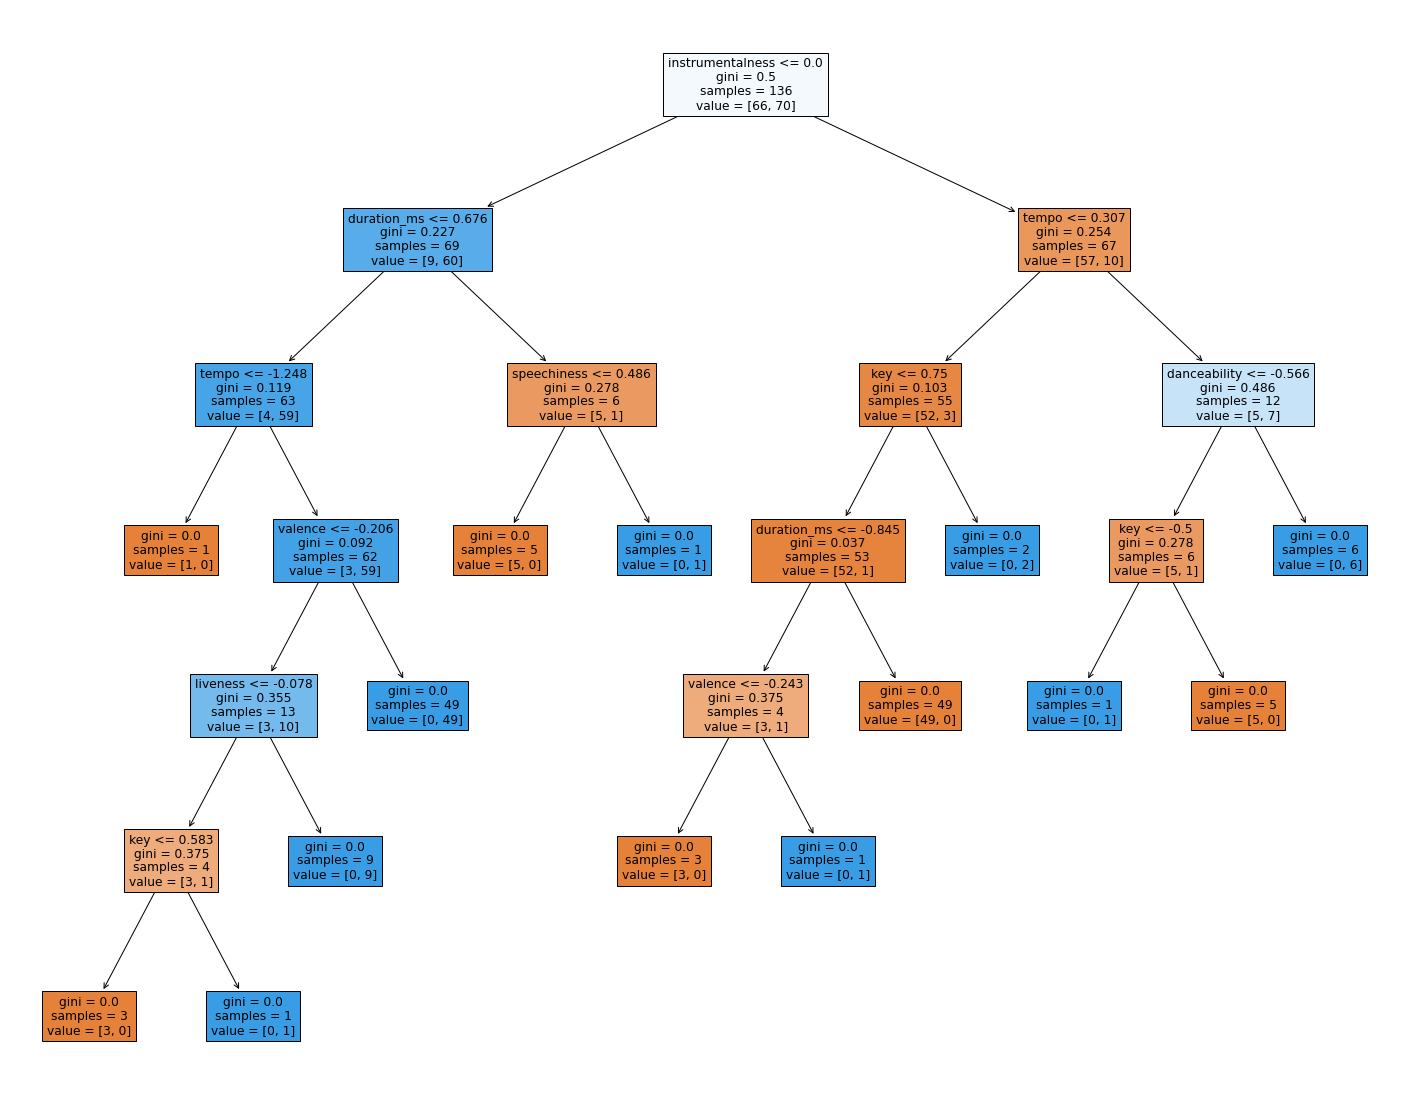

In [358]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, feature_names=x.columns, filled=True)

### Comparing the f1 score against each model

In [359]:
# def f1score(clf,x_test,y_test):
#     #print(clf)
#     y_predict=clf.predict(x_test)
#     if clf==knn:
#         print('For KNN, confusion matrix and classification report is')
#     elif clf==lr:
#         print('For Logistic Regression, confusion matrix and classification report is')
#     elif clf==dt:
#         print('For Decision Tree, confusion matrix and classification report is')
#     else:
#         print('For Random Forest, confusion matrix and classification report is')
#     print(confusion_matrix(y_test,y_predict))
#     print(classification_report(y_test,y_predict,target_names=['Disliked','Liked']))

In [360]:
# clf=[knn,lr,dt,rf]
# for i in clf:
#     #print(i)
#     f1score(i,x_test,y_test)

In [361]:
clf=[knn,lr,dt,rf]
for i in clf:
    #print(i)
    evaluation_metric(i,x_scaled,y,5,'f1')

For KNeighborsClassifier(), f1 is 0.90
For LogisticRegression(random_state=1), f1 is 0.92
For DecisionTreeClassifier(random_state=1), f1 is 0.83
For RandomForestClassifier(random_state=2), f1 is 0.93


In [362]:
clf=[knn,lr,dt,rf]
for i in clf:
    #print(i)
    evaluation_metric(i,x_scaled,y,5,'precision')

For KNeighborsClassifier(), precision is 0.87
For LogisticRegression(random_state=1), precision is 0.91
For DecisionTreeClassifier(random_state=1), precision is 0.83
For RandomForestClassifier(random_state=2), precision is 0.93


In [363]:
clf=[knn,lr,dt,rf]
for i in clf:
    #print(i)
    evaluation_metric(i,x_scaled,y,5,'recall')

For KNeighborsClassifier(), recall is 0.94
For LogisticRegression(random_state=1), recall is 0.94
For DecisionTreeClassifier(random_state=1), recall is 0.85
For RandomForestClassifier(random_state=2), recall is 0.92


In [364]:
clf=[knn,lr,dt,rf]
for i in clf:
    #print(i)
    evaluation_metric(i,x_scaled,y,5,'roc_auc')

For KNeighborsClassifier(), roc_auc is 0.94
For LogisticRegression(random_state=1), roc_auc is 0.97
For DecisionTreeClassifier(random_state=1), roc_auc is 0.82
For RandomForestClassifier(random_state=2), roc_auc is 0.97


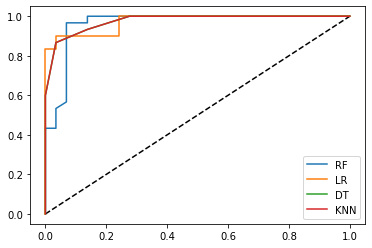

In [365]:
y_pred_prob_rf=rf.predict_proba(x_test)[:,1]
y_pred_prob_lr=lr.predict_proba(x_test)[:,1]
y_pred_prob_dt=dt.predict_proba(x_test)[:,1]
y_pred_prob_dt=knn.predict_proba(x_test)[:,1]
fpr_knn,tpr_knn,thresholds_dt=roc_curve(y_test,y_pred_prob_dt)
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,y_pred_prob_rf)
fpr_lr,tpr_lr,thresholds_lr=roc_curve(y_test,y_pred_prob_lr)
fpr_dt,tpr_dt,thresholds_dt=roc_curve(y_test,y_pred_prob_dt)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot(fpr_lr,tpr_lr,label='LR')
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.legend()
plt.show()

## HyperParameter Tuning

In [366]:
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':[100, 10, 1.0, 0.1, 0.01],'penalty':['l2']}

grid_search=GridSearchCV(lr,param_grid,cv=5,scoring='roc_auc')
grid_search.fit(x_train,y_train)
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.98
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.97


In [367]:
param_grid={'n_estimators':[10,100,500,1000],'max_features':['sqrt','log2']}

grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='roc_auc')
grid_search.fit(x_train,y_train)
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.97
Best parameters: {'max_features': 'sqrt', 'n_estimators': 1000}
Best cross-validation score: 0.96


In [368]:
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':[100, 10, 1.0, 0.1, 0.01],'penalty':['l2']}

grid_search=GridSearchCV(lr,param_grid,cv=5,scoring='f1')
grid_search.fit(x_train,y_train)
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.89
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.92


In [369]:
param_grid={'n_estimators':[10,100,500,1000],'max_features':['sqrt','log2']}

grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='f1')
grid_search.fit(x_train,y_train)
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.94
Best parameters: {'max_features': 'sqrt', 'n_estimators': 1000}
Best cross-validation score: 0.93


## Feature Importance

In [370]:
x.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

[12.37241126  4.27825621  1.76480177  7.72353726  0.39361667 13.78471571
  4.04792363 23.6405875   2.5826151   5.99544024  8.56322124 14.38050568
  0.47236774]
Feature: 0, Score: 12.37241
Feature: 1, Score: 4.27826
Feature: 2, Score: 1.76480
Feature: 3, Score: 7.72354
Feature: 4, Score: 0.39362
Feature: 5, Score: 13.78472
Feature: 6, Score: 4.04792
Feature: 7, Score: 23.64059
Feature: 8, Score: 2.58262
Feature: 9, Score: 5.99544
Feature: 10, Score: 8.56322
Feature: 11, Score: 14.38051
Feature: 12, Score: 0.47237


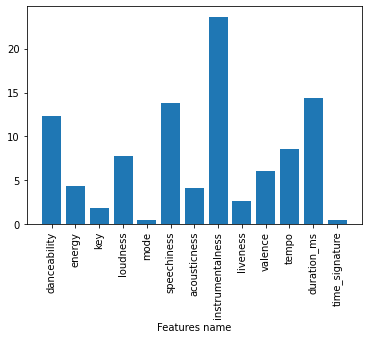

In [371]:
feature_importances = grid_search.best_estimator_.feature_importances_*100
print(feature_importances)
# summarize feature importance
for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(list(x.columns), feature_importances)
plt.xlabel('Features name')
plt.xticks(rotation='vertical')
plt.show()

In [372]:
yt=pd.DataFrame(y_test)
yt.reset_index(inplace=True)
yt.drop('index',axis=1,inplace=True)
yt.head()

,liked
0,1
1,0
2,0
3,0
4,0


In [373]:
yt['rf_p']=rf.predict(x_test)
yt['knn_p']=knn.predict(x_test)
yt.head()

,liked,rf_p,knn_p
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [374]:
def all_correct(row):
    if row['liked']==row['rf_p']==row['knn_p']:
        return 'a'
    elif (row['liked']==row['rf_p']) & (row['liked']!=row['knn_p']):
        return 'b'
    elif (row['liked']!=row['rf_p']) & (row['liked']==row['knn_p']):
        return 'c'
    elif (row['liked']!=row['rf_p']) & (row['liked']!=row['knn_p']):
        return 'd'

In [375]:
yt['addi']=yt.apply(lambda row:all_correct(row),axis=1)
yt.head()

,liked,rf_p,knn_p,addi
0,1,1,1,a
1,0,0,0,a
2,0,0,0,a
3,0,0,0,a
4,0,0,0,a


In [376]:
yt['addi'].value_counts()

a    52
d     3
b     3
c     1
Name: addi, dtype: int64

In [377]:
from statsmodels.stats.contingency_tables import mcnemar

In [378]:
tb=[[52,3],[1,3]]
tb

[[52, 3], [1, 3]]

In [379]:
print(mcnemar(tb, exact=False, correction=True))

pvalue      0.6170750774519739
statistic   0.25


In [380]:
a=cross_val_score(rf,x,y,cv=30,scoring='f1')
b=cross_val_score(knn,x,y,cv=30,scoring='f1')

In [382]:
from scipy.stats import ttest_rel

# Python paired sample t-test
ttest_rel(a, b)

Ttest_relResult(statistic=4.708312831074631, pvalue=5.702996670149846e-05)